# ML Odyssey: Part 2 - Data Manipulation & Visualization with Python

This notebook contains all the code examples from the blog post "ML Odyssey: Part 2 - Data Manipulation & Visualization with Python".

## 🎯 What You'll Learn

1. **Data Processing**: NumPy & Pandas fundamentals
2. **Data Visualization**: Matplotlib & Seaborn for insights
3. **Practical Examples**: Real-world data analysis workflows

## 📚 Prerequisites

Make sure you have these libraries installed:
```bash
pip install pandas numpy matplotlib seaborn scipy
```

---

### 1.4 🔍 Understanding EDA Concepts

Let's start with the fundamental concepts and a simple example to understand the structure of data.

In [5]:
# Example: Pokemon dataset structure
import pandas as pd

# Sample Pokemon dataset
pokemon_data = pd.DataFrame({
    'name': ['Pikachu', 'Charizard', 'Bulbasaur'],      # Identifier (not typically a feature)
    'attack': [55, 84, 49],                             # Feature 1
    'defense': [40, 78, 49],                            # Feature 2  
    'speed': [90, 100, 45],                             # Feature 3
    'type': ['Electric', 'Fire', 'Grass'],              # Feature 4 (categorical)
    'is_legendary': [False, False, False]               # Label (what we want to predict)
})

print("Dataset shape:", pokemon_data.shape)  # (3 rows, 6 columns)
print("\nFeatures (input):", ['attack', 'defense', 'speed', 'type'])
print("Label (target):", 'is_legendary')

Dataset shape: (3, 6)

Features (input): ['attack', 'defense', 'speed', 'type']
Label (target): is_legendary


### 1.6 🧰 The Complete EDA Toolkit Integration

Let's see how all the tools work together in a practical example:

Full DataFrame:
            Attack  Defense          Type
Pikachu        55       40      Electric
Charizard      84       78   Fire/Flying
Bulbasaur      49       49  Grass/Poison


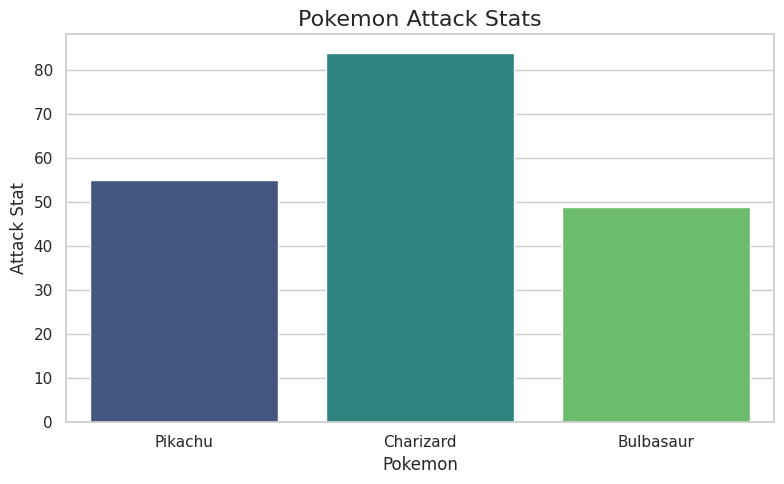


Average Stats:
Mean Attack: 62.7
Standard Deviation Attack: 15.3

Statistical Validation:
Attack-Defense correlation: 0.925
P-value: 0.248 (Not significant relationship)


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  # Import scipy.stats as 'stats'

# Raw numerical data (renamed from 'stats' to 'raw_stats_data' to avoid conflict)
raw_stats_data = np.array([[55, 40], [84, 78], [49, 49]])

# Create a structured DataFrame
data = pd.DataFrame(
    raw_stats_data,
    columns=['Attack', 'Defense'], # Changed to PascalCase for consistency
    index=['Pikachu', 'Charizard', 'Bulbasaur']
)

# Add Pokemon types
data['Type'] = ['Electric', 'Fire/Flying', 'Grass/Poison'] # Changed to PascalCase

# Display the DataFrame
print("Full DataFrame:\n", data)

# --- Visualization: Attack Stats Bar Plot ---
sns.set_theme(style="whitegrid") # Apply a clean seaborn theme
plt.figure(figsize=(8, 5)) # Set a good figure size

# Create a bar plot for Attack Stats
# FIX: Added hue='index' and legend=False to address FutureWarning
sns.barplot(data=data.reset_index(), x='index', y='Attack', hue='index', legend=False, palette='viridis')
plt.title('Pokemon Attack Stats', fontsize=16) # Clearer title
plt.xlabel('Pokemon', fontsize=12) # Clearer label
plt.ylabel('Attack Stat', fontsize=12) # Clearer label
plt.xticks(rotation=0) # Keep labels horizontal
plt.tight_layout()
plt.show()

# --- Descriptive Statistics ---
print("\nAverage Stats:")
print(f"Mean Attack: {np.mean(data['Attack']):.1f}")
print(f"Standard Deviation Attack: {np.std(data['Attack']):.1f}") # Clarified for which stat

# --- Statistical Validation ---
# Example: Are attack and defense significantly correlated?
# 'stats.pearsonr' now correctly refers to the function from scipy.stats
correlation, p_value = stats.pearsonr(data['Attack'], data['Defense'])
print(f"\nStatistical Validation:")
print(f"Attack-Defense correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f} ({'Significant' if p_value < 0.05 else 'Not significant'} relationship)")


## 3. 📊 Pandas in 10 Minutes

Let's explore the essential features of pandas that you'll use in 90% of your data analysis tasks:

### 3.1 Creating Data

Pandas makes it easy to create labeled one-dimensional arrays (Series) and two-dimensional tables (DataFrames) from scratch or from existing data.

In [7]:
import pandas as pd
import numpy as np

# Creating a Series (1D array with labels)
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print("Series example:\n", s)

# Creating a DataFrame (2D table)
dates = pd.date_range('20250101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), 
         index=dates,
         columns=['A', 'B', 'C', 'D'])
print("\nDataFrame example:\n", df)

Series example:
 0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

DataFrame example:
                    A         B         C         D
2025-01-01  0.431180 -0.297986 -1.084964  0.761129
2025-01-02  0.234846 -0.779568 -0.996394 -1.220446
2025-01-03  0.823725  1.005475 -1.882042  0.268611
2025-01-04 -0.191431  0.446284  0.082874  1.218962
2025-01-05 -0.822649 -1.639593  1.897116 -1.473984
2025-01-06 -0.616455  1.541123  0.074720  0.170778


### 3.2 Viewing Data

Pandas provides convenient methods to quickly inspect your data, check its structure, and get summary statistics.

In [8]:
# Quick overview
print("First 5 rows:\n", df.head())
print("\nDataFrame info:\n", df.info())
print("\nQuick statistics:\n", df.describe())

# Index and columns
print("\nIndex:", df.index)
print("Columns:", df.columns)

First 5 rows:
                    A         B         C         D
2025-01-01  0.431180 -0.297986 -1.084964  0.761129
2025-01-02  0.234846 -0.779568 -0.996394 -1.220446
2025-01-03  0.823725  1.005475 -1.882042  0.268611
2025-01-04 -0.191431  0.446284  0.082874  1.218962
2025-01-05 -0.822649 -1.639593  1.897116 -1.473984
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2025-01-01 to 2025-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes

DataFrame info:
 None

Quick statistics:
               A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean  -0.023464  0.045956 -0.318115 -0.045825
std    0.633988  1.179604  1.320329  1.078519
min   -0.822649 -1.639593 -1.882042 -1.473984
25%   -0.5

### 3.3 Selection and Indexing

You can easily select columns, rows, or specific values using labels, positions, or boolean conditions.

In [9]:
# Getting a column
print("Column 'A':\n", df['A'])

# Selecting by position
print("First 3 rows:\n", df[:3])

# Selection by label
print("By labels:\n", df.loc['20250102':'20250104'])

# Selection by position
print("By position:\n", df.iloc[3:5, 0:2])

# Boolean indexing
print("Values > 0:\n", df[df > 0])

Column 'A':
 2025-01-01    0.431180
2025-01-02    0.234846
2025-01-03    0.823725
2025-01-04   -0.191431
2025-01-05   -0.822649
2025-01-06   -0.616455
Freq: D, Name: A, dtype: float64
First 3 rows:
                    A         B         C         D
2025-01-01  0.431180 -0.297986 -1.084964  0.761129
2025-01-02  0.234846 -0.779568 -0.996394 -1.220446
2025-01-03  0.823725  1.005475 -1.882042  0.268611
By labels:
                    A         B         C         D
2025-01-02  0.234846 -0.779568 -0.996394 -1.220446
2025-01-03  0.823725  1.005475 -1.882042  0.268611
2025-01-04 -0.191431  0.446284  0.082874  1.218962
By position:
                    A         B
2025-01-04 -0.191431  0.446284
2025-01-05 -0.822649 -1.639593
Values > 0:
                    A         B         C         D
2025-01-01  0.431180       NaN       NaN  0.761129
2025-01-02  0.234846       NaN       NaN       NaN
2025-01-03  0.823725  1.005475       NaN  0.268611
2025-01-04       NaN  0.446284  0.082874  1.218962
2025-0

### 3.4 Operations

Pandas supports a wide range of operations, from basic statistics to applying custom functions and grouping data for aggregation.

In [10]:
# Statistics
print("Mean by column:\n", df.mean())
print("Mean by row:\n", df.mean(axis=1))

# Applying functions
print("\nApply custom function:")
print(df.apply(lambda x: x.max() - x.min()))

# Grouping
df['E'] = ['one', 'one', 'two', 'three', 'two', 'one']
grouped = df.groupby('E')
print("\nGroup sums:\n", grouped.sum())

Mean by column:
 A   -0.023464
B    0.045956
C   -0.318115
D   -0.045825
dtype: float64
Mean by row:
 2025-01-01   -0.047660
2025-01-02   -0.690390
2025-01-03    0.053942
2025-01-04    0.389172
2025-01-05   -0.509777
2025-01-06    0.292541
Freq: D, dtype: float64

Apply custom function:
A    1.646374
B    3.180716
C    3.779158
D    2.692946
dtype: float64

Group sums:
               A         B         C         D
E                                            
one    0.049571  0.463569 -2.006638 -0.288539
three -0.191431  0.446284  0.082874  1.218962
two    0.001075 -0.634117  0.015074 -1.205373


### 3.5 Handling Missing Data

Real-world data is often incomplete. Pandas offers simple ways to detect, remove, or fill in missing values.

In [11]:
# Create some missing data
df2 = df.copy()
df2.iloc[0:2, 0] = np.nan

# Drop rows with missing data
print("Drop NA rows:\n", df2.dropna())

# Fill missing data
print("Fill NA with 0:\n", df2.fillna(0))

Drop NA rows:
                    A         B         C         D      E
2025-01-03  0.823725  1.005475 -1.882042  0.268611    two
2025-01-04 -0.191431  0.446284  0.082874  1.218962  three
2025-01-05 -0.822649 -1.639593  1.897116 -1.473984    two
2025-01-06 -0.616455  1.541123  0.074720  0.170778    one
Fill NA with 0:
                    A         B         C         D      E
2025-01-01  0.000000 -0.297986 -1.084964  0.761129    one
2025-01-02  0.000000 -0.779568 -0.996394 -1.220446    one
2025-01-03  0.823725  1.005475 -1.882042  0.268611    two
2025-01-04 -0.191431  0.446284  0.082874  1.218962  three
2025-01-05 -0.822649 -1.639593  1.897116 -1.473984    two
2025-01-06 -0.616455  1.541123  0.074720  0.170778    one


### 3.6 Merging and Reshaping

Combining multiple datasets and reshaping tables is a breeze with pandas.

In [12]:
# Concatenating
pieces = [df[:2], df[2:4], df[4:]]
print("Concatenated:\n", pd.concat(pieces))

# Merging
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print("\nMerged:\n", pd.merge(left, right, on='key'))

Concatenated:
                    A         B         C         D      E
2025-01-01  0.431180 -0.297986 -1.084964  0.761129    one
2025-01-02  0.234846 -0.779568 -0.996394 -1.220446    one
2025-01-03  0.823725  1.005475 -1.882042  0.268611    two
2025-01-04 -0.191431  0.446284  0.082874  1.218962  three
2025-01-05 -0.822649 -1.639593  1.897116 -1.473984    two
2025-01-06 -0.616455  1.541123  0.074720  0.170778    one

Merged:
    key  lval  rval
0  foo     1     4
1  bar     2     5


## 4. 🔥 Advanced Pandas with Pivot Tables

**What is a Pivot Table?** Think of it as a smart way to reorganize and summarize your data. Instead of looking at hundreds of individual rows, pivot tables let you quickly see patterns by grouping and aggregating data in a cross-tabulated format.

🔄 **The Magic**: Pivot tables take long, repetitive data and transform it into a concise summary table where you can easily compare values across different categories.

In [13]:
import pandas as pd
import numpy as np

# Create sample sales data - this is your "normal" table
np.random.seed(42)  # For consistent results
sales_data = pd.DataFrame({
    'date': pd.date_range('2024-01-01', periods=20, freq='D'),
    'product': np.random.choice(['Laptop', 'Phone', 'Tablet'], 20),
    'sales': np.random.randint(50, 150, 20),
    'region': np.random.choice(['North', 'South', 'East', 'West'], 20),
    'salesperson': np.random.choice(['Alice', 'Bob', 'Charlie'], 20)
})

print("📊 ORIGINAL DATA (first 10 rows):")
print(sales_data.head(10))
print(f"\nTotal rows: {len(sales_data)}")

📊 ORIGINAL DATA (first 10 rows):
        date product  sales region salesperson
0 2024-01-01  Tablet    113   East       Alice
1 2024-01-02  Laptop    109   West         Bob
2 2024-01-03  Tablet     70   East       Alice
3 2024-01-04  Tablet     82   West         Bob
4 2024-01-05  Laptop    125   West     Charlie
5 2024-01-06  Laptop    107  North     Charlie
6 2024-01-07  Tablet     71   East       Alice
7 2024-01-08   Phone    138  North     Charlie
8 2024-01-09  Tablet     98   East     Charlie
9 2024-01-10  Tablet    140   East         Bob

Total rows: 20


### 4.2 The Problem with Normal Tables

Looking at the raw data above, can you quickly answer these questions?
- Which product sells best in each region?
- What's the average sales per product?
- Which region performs better overall?

It's hard to see patterns when data is in long format! 🤔

In [14]:
# 🔥 PIVOT TABLE MAGIC: Transform rows into a summary
pivot_table = sales_data.pivot_table(
    values='sales',           # What to summarize
    index='product',          # Rows: Group by product
    columns='region',         # Columns: Split by region  
    aggfunc='mean',          # How to summarize: average
    margins=True             # Add totals
)

print("📈 PIVOT TABLE - Average Sales by Product and Region:")
print(pivot_table.round(1))

# Compare with manual grouping (much more verbose!)
print("\n🔄 Same result using traditional grouping (more complex):")
manual_summary = sales_data.groupby(['product', 'region'], observed=False)['sales'].mean().unstack(fill_value=0)
print(manual_summary.round(1))

📈 PIVOT TABLE - Average Sales by Product and Region:
region    East  North  South   West    All
product                                   
Laptop   141.0   85.5    NaN  117.0  109.2
Phone      NaN  138.0  106.0  120.0  116.0
Tablet    98.4   99.5  109.0   82.0   98.0
All      105.5  101.6  106.8  111.2  106.2

🔄 Same result using traditional grouping (more complex):
region    East  North  South   West
product                            
Laptop   141.0   85.5    0.0  117.0
Phone      0.0  138.0  106.0  120.0
Tablet    98.4   99.5  109.0   82.0


### 4.4 Real-World Pivot Table Examples

Let's explore more advanced pivot table capabilities:

In [15]:
# Example 1: Multiple metrics in one table
multi_metric_pivot = sales_data.pivot_table(
    values='sales',
    index='product',
    columns='region',
    aggfunc=['mean', 'sum', 'count'],  # Multiple aggregations!
    margins=True
)
print("📊 Multiple metrics (mean, sum, count):")
print(multi_metric_pivot)

# Example 2: Time-based analysis
sales_data['month'] = sales_data['date'].dt.month
time_pivot = sales_data.pivot_table(
    values='sales',
    index='month',
    columns='product',
    aggfunc='sum',
    fill_value=0
)
print("\n📅 Sales by month and product:")
print(time_pivot)

📊 Multiple metrics (mean, sum, count):
          mean                                 sum                             \
region    East  North   South   West    All   East  North  South   West   All   
product                                                                         
Laptop   141.0   85.5     NaN  117.0  109.2  141.0  171.0    NaN  234.0   546   
Phone      NaN  138.0  106.00  120.0  116.0    NaN  138.0  318.0  240.0   696   
Tablet    98.4   99.5  109.00   82.0   98.0  492.0  199.0  109.0   82.0   882   
All      105.5  101.6  106.75  111.2  106.2  633.0  508.0  427.0  556.0  2124   

        count                       
region   East North South West All  
product                             
Laptop    1.0   2.0   NaN  2.0   5  
Phone     NaN   1.0   3.0  2.0   6  
Tablet    5.0   2.0   1.0  1.0   9  
All       6.0   5.0   4.0  5.0  20  

📅 Sales by month and product:
product  Laptop  Phone  Tablet
month                         
1           546    696     882


### 4.5 Advanced Grouping Techniques

Let's explore some advanced pandas operations:

In [16]:
# 1. Rolling windows for trends
sales_data['rolling_avg'] = sales_data.groupby('product', observed=False)['sales'].rolling(7).mean().reset_index(0, drop=True)

# 2. String operations
sales_data['product_category'] = sales_data['product'].str.upper() + '_CATEGORY'

# 3. Advanced groupby with multiple functions
summary = sales_data.groupby('product', observed=False)['sales'].agg(['mean', 'std', 'count', 'sum'])
print("\nAdvanced groupby:\n", summary)


Advanced groupby:
           mean        std  count  sum
product                              
Laptop   109.2  28.761085      5  546
Phone    116.0  15.019987      6  696
Tablet    98.0  22.438806      9  882


## 5. 📈 Advanced Matplotlib and Seaborn

### 5.1 Finding the Right Visualization

Let's see how all these tools work together in a practical example. We'll analyze restaurant tip data to uncover insights:

Dataset shape: (244, 7)

Data types:
 total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

Missing values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Basic statistics:
        total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


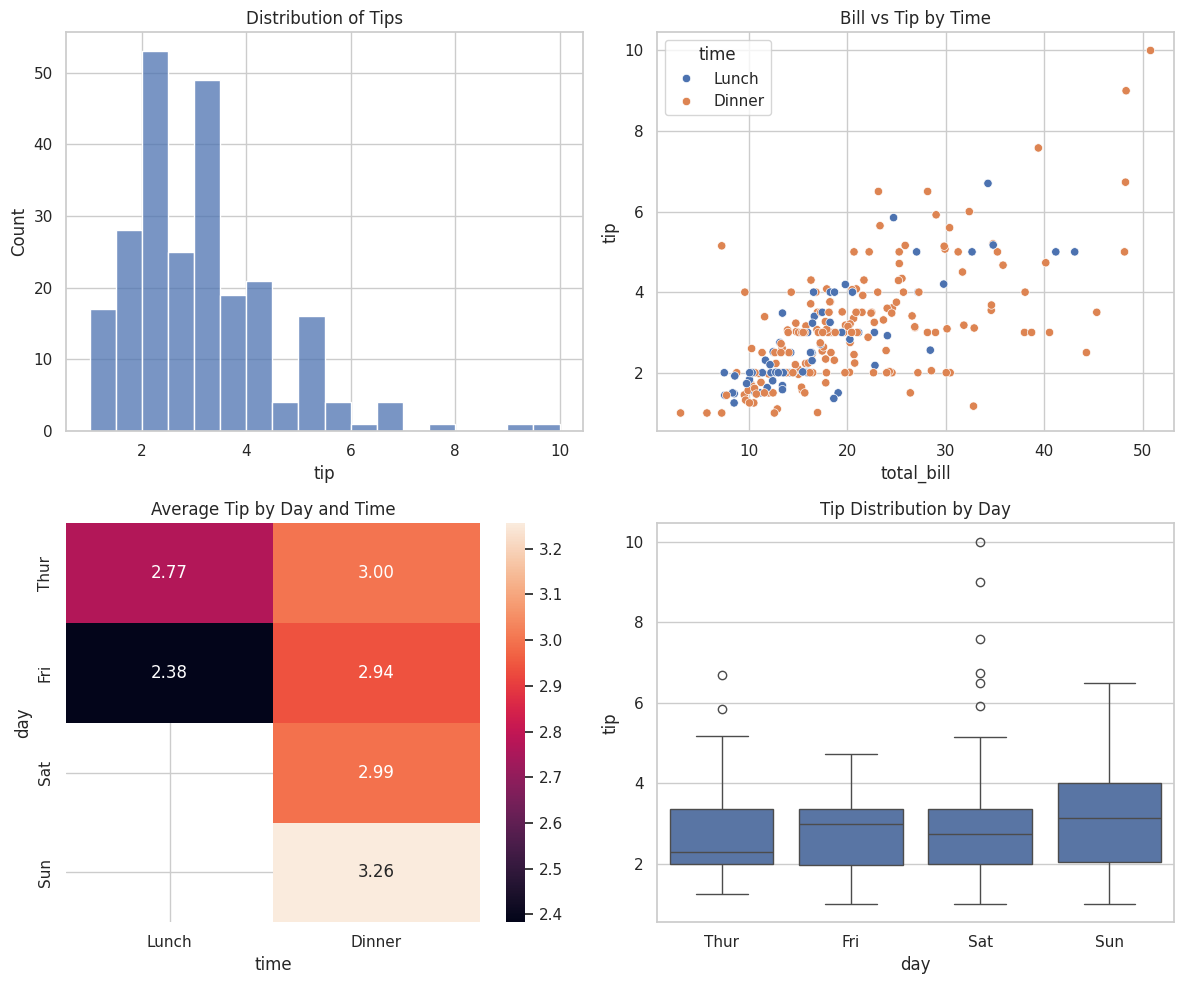


🔍 Key Insights:
• Average tip: $3.00
• Best tipping day: Sun
• Tip percentage: 16.1%


In [17]:
# Complete data exploration pipeline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load real data (seaborn includes several datasets)
tips = sns.load_dataset('tips')

# Quick exploration pipeline
print("Dataset shape:", tips.shape)
print("\nData types:\n", tips.dtypes)
print("\nMissing values:\n", tips.isnull().sum())
print("\nBasic statistics:\n", tips.describe())

# Create insights with pandas + seaborn
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribution of tips
sns.histplot(data=tips, x='tip', ax=axes[0,0])
axes[0,0].set_title('Distribution of Tips')

# Relationship between total bill and tip
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', ax=axes[0,1])
axes[0,1].set_title('Bill vs Tip by Time')

# Average tip by day and time
tip_summary = tips.groupby(['day', 'time'], observed=False)['tip'].mean().unstack()
sns.heatmap(tip_summary, annot=True, fmt='.2f', ax=axes[1,0])
axes[1,0].set_title('Average Tip by Day and Time')

# Box plot showing tip distribution by day
sns.boxplot(data=tips, x='day', y='tip', ax=axes[1,1])
axes[1,1].set_title('Tip Distribution by Day')

plt.tight_layout()
plt.show()

# Generate insights using pandas
print("\n🔍 Key Insights:")
print(f"• Average tip: ${tips['tip'].mean():.2f}")
print(f"• Best tipping day: {tips.groupby('day', observed=False)['tip'].mean().idxmax()}")
print(f"• Tip percentage: {(tips['tip'] / tips['total_bill'] * 100).mean():.1f}%")

### 5.2 Statistical Insights with Seaborn

Seaborn shines when you need to understand statistical relationships in your data. Let's explore the famous iris dataset:

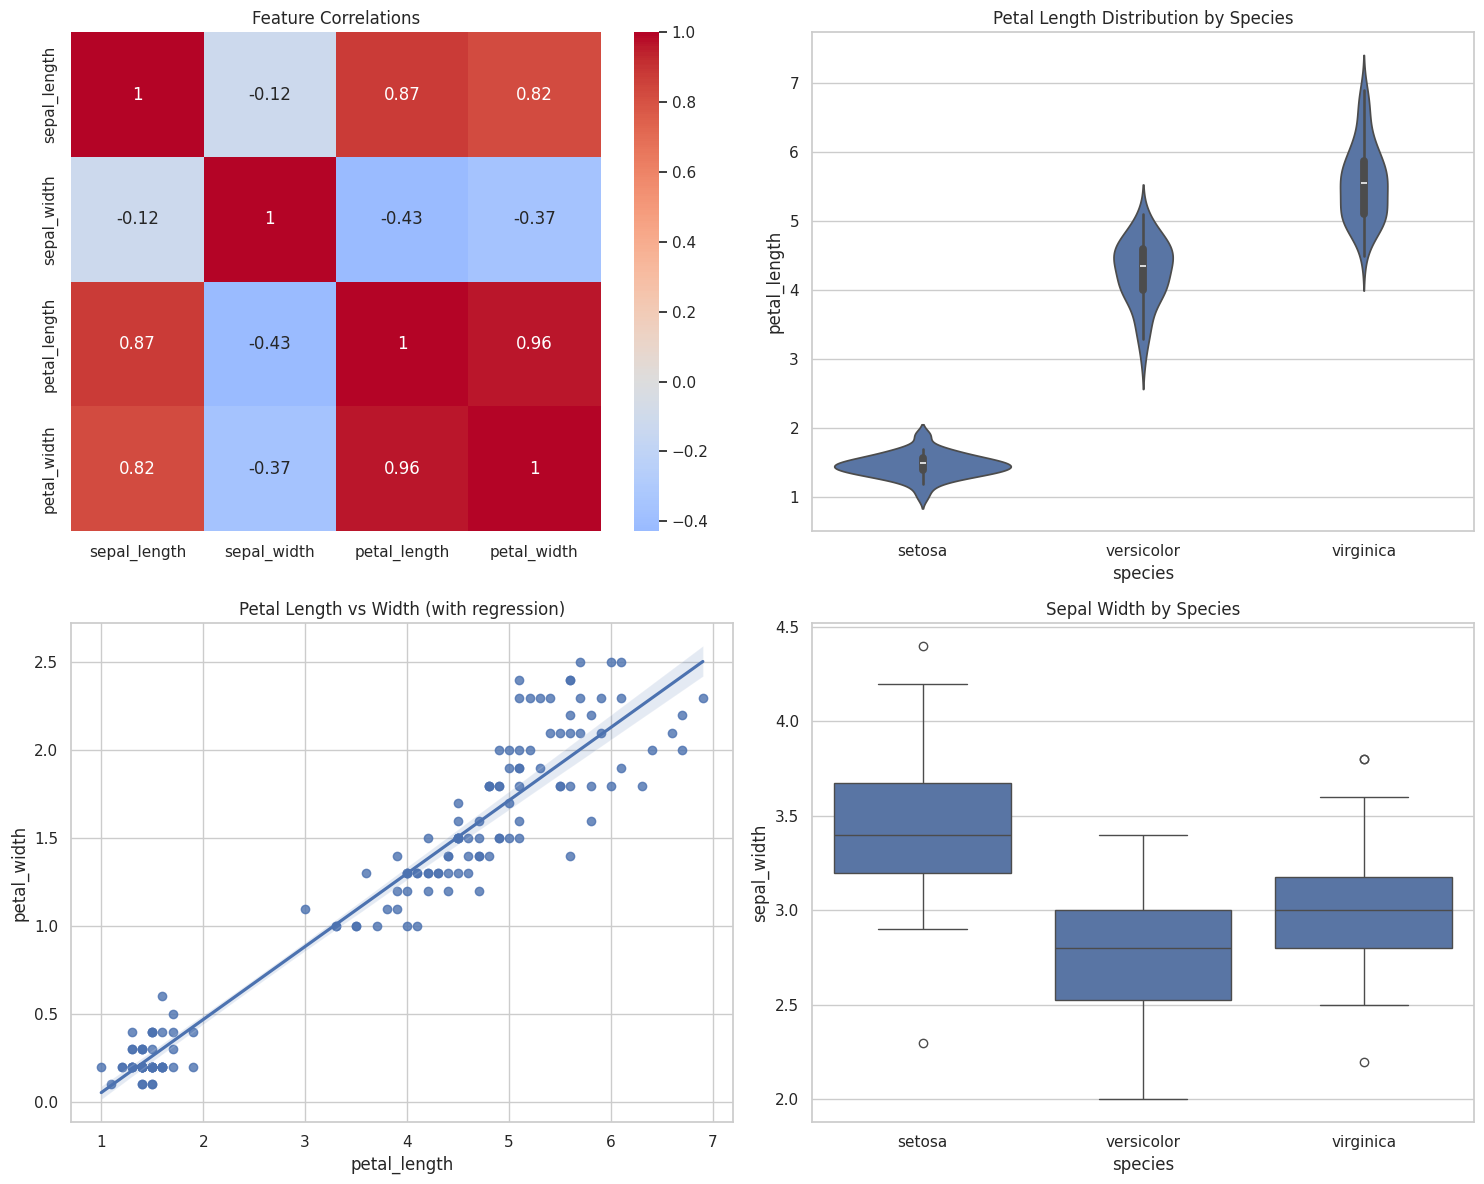

<Figure size 1000x800 with 0 Axes>

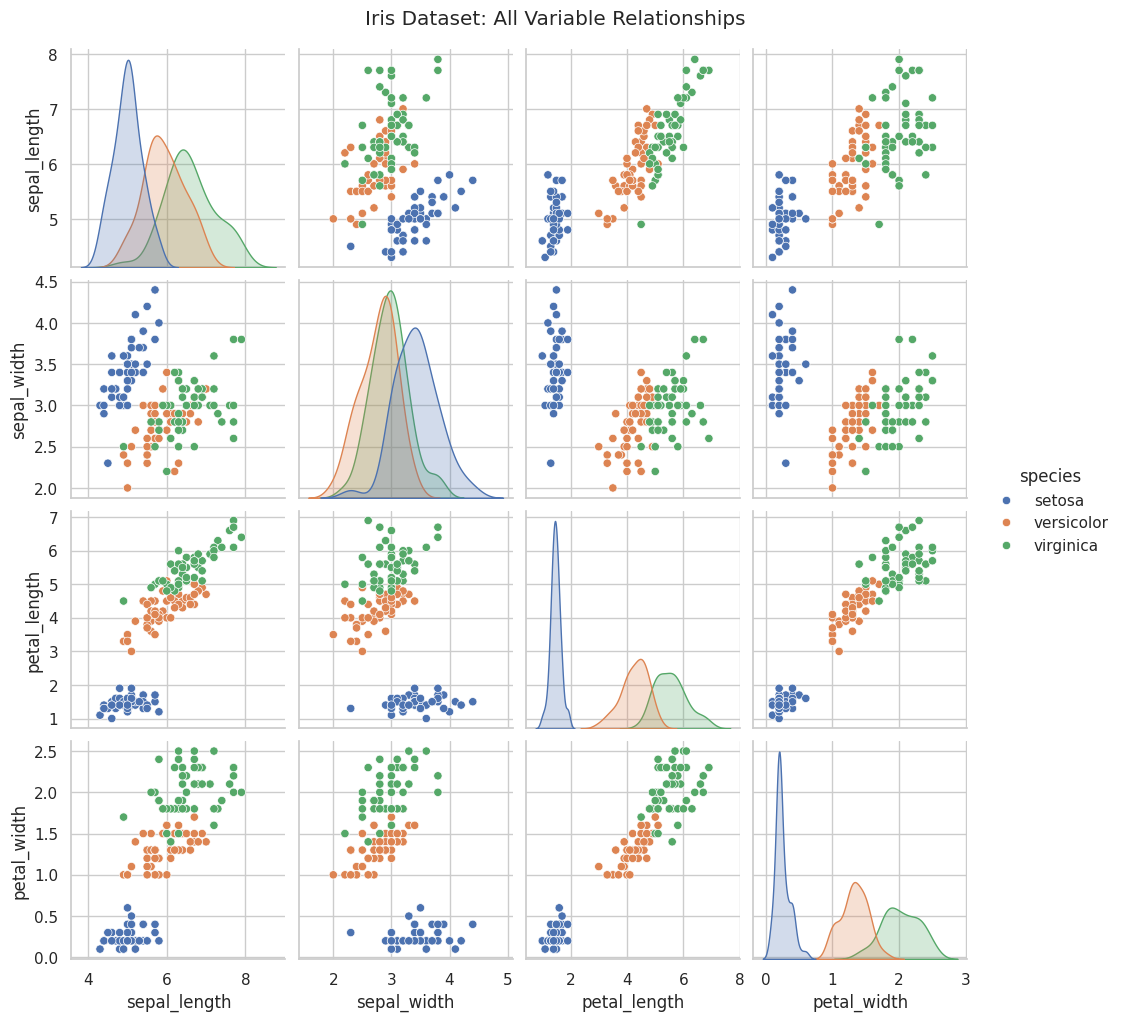

🔍 Key insights from our analysis:
• Strong correlation between petal length and width (r=0.96)
• Clear species separation based on petal measurements
• Setosa species has distinctly different characteristics
• Petal features are more discriminative than sepal features


In [18]:
# Using seaborn for statistical insights
import seaborn as sns
import pandas as pd
import numpy as np

# Load a dataset with interesting relationships
iris = sns.load_dataset('iris')

# Create a comprehensive statistical overview
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Correlation heatmap
correlation_matrix = iris.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0,0])
axes[0,0].set_title('Feature Correlations')

# 2. Distribution comparison
sns.violinplot(data=iris, x='species', y='petal_length', ax=axes[0,1])
axes[0,1].set_title('Petal Length Distribution by Species')

# 3. Statistical regression
sns.regplot(data=iris, x='petal_length', y='petal_width', ax=axes[1,0])
axes[1,0].set_title('Petal Length vs Width (with regression)')

# 4. Categorical relationships
sns.boxplot(data=iris, x='species', y='sepal_width', ax=axes[1,1])
axes[1,1].set_title('Sepal Width by Species')

plt.tight_layout()
plt.show()

# The famous pairplot - shows all relationships at once
plt.figure(figsize=(10, 8))
sns.pairplot(iris, hue='species', height=2.5)
plt.suptitle('Iris Dataset: All Variable Relationships', y=1.02)
plt.show()

# Statistical insights from the analysis
print("🔍 Key insights from our analysis:")
print("• Strong correlation between petal length and width (r=0.96)")
print("• Clear species separation based on petal measurements")
print("• Setosa species has distinctly different characteristics")
print("• Petal features are more discriminative than sepal features")

### 5.3 Time Series Analysis Preview

Since time series data is common in real-world projects, here's a taste of pandas' time series capabilities:

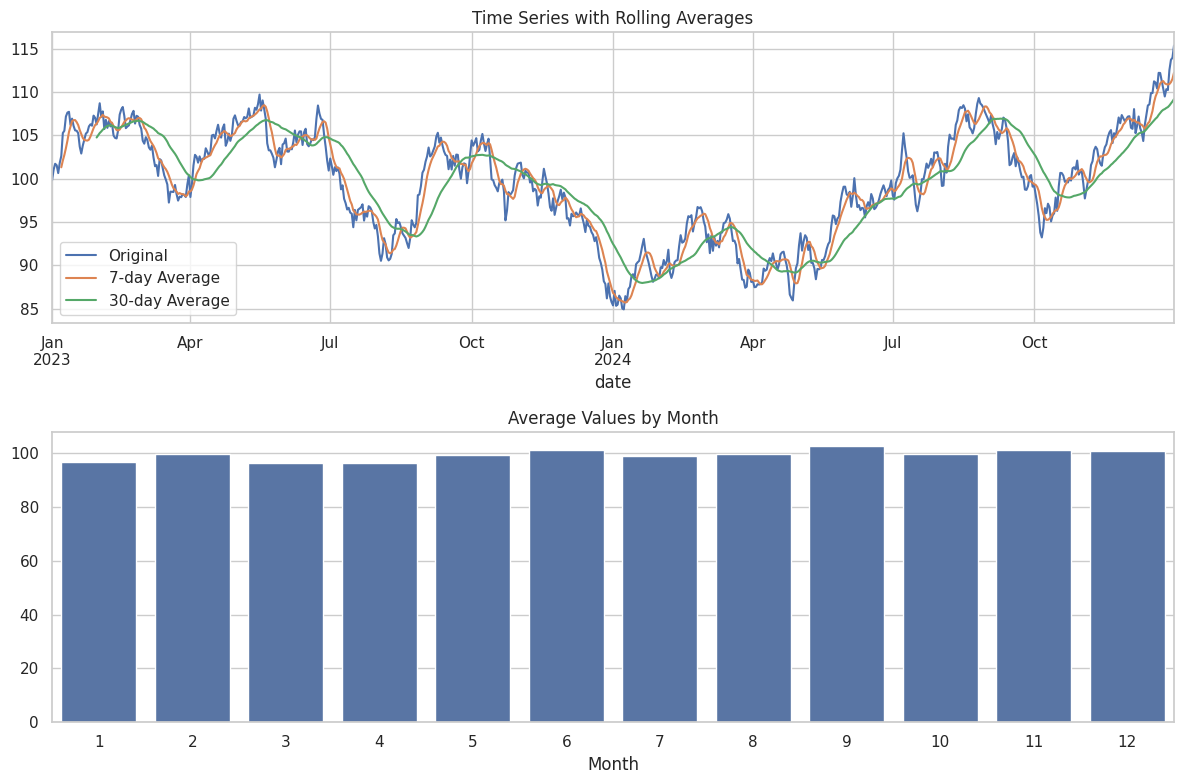

📅 Time series insights:
• Data spans 731 days
• Monthly peak: 9
• Trend: Rising


In [19]:
# Time series analysis with pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create sample time series data
dates = pd.date_range('2023-01-01', '2024-12-31', freq='D')
ts_data = pd.DataFrame({
    'date': dates,
    'value': np.cumsum(np.random.randn(len(dates))) + 100,
    'category': np.random.choice(['A', 'B'], len(dates))
})

# Set date as index for time series operations
ts_data.set_index('date', inplace=True)

# Time series specific operations
ts_data['month'] = ts_data.index.month
ts_data['weekday'] = ts_data.index.day_name()
ts_data['rolling_7d'] = ts_data['value'].rolling(7).mean()
ts_data['rolling_30d'] = ts_data['value'].rolling(30).mean()

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Time series plot with multiple rolling averages
ts_data[['value', 'rolling_7d', 'rolling_30d']].plot(ax=axes[0])
axes[0].set_title('Time Series with Rolling Averages')
axes[0].legend(['Original', '7-day Average', '30-day Average'])

# Monthly patterns
monthly_avg = ts_data.groupby('month')['value'].mean()
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, ax=axes[1])
axes[1].set_title('Average Values by Month')
axes[1].set_xlabel('Month')

plt.tight_layout()
plt.show()

print("📅 Time series insights:")
print(f"• Data spans {len(ts_data)} days")
print(f"• Monthly peak: {monthly_avg.idxmax()}")
print(f"• Trend: {'Rising' if ts_data['value'].iloc[-30:].mean() > ts_data['value'].iloc[:30].mean() else 'Falling'}")